In [1]:
import pandas as pd

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #see below about "lemmatization"
lemmatizer = WordNetLemmatizer()
import re
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lngng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lngng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lngng\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('Exam_MB210_NLP.csv')

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
df["description"] = df["tagline"].astype(str) + " " + df["overview"].astype(str)

In [6]:
df["description"].head(1)

0    Enter the World of Pandora. In the 22nd centur...
Name: description, dtype: object

In [7]:
def preprocessing(corpus): #same as previous sessions
    stops = stopwords.words('english') #getting the english stop words list from NLTK
    corpusTokens = [word_tokenize(item) for item in corpus] #tokenizing with the word_tokenize method of NLTK
    def tokenCleaner(token): 
        return lemmatizer.lemmatize(re.sub('[^A-ZÆØÅa-zæøå0-9]','',token.strip().lower()))
    vocabulary = list() #initializing empty vocabulary as list
    for index,item in enumerate(corpusTokens): #looping over each document (which has been tokenized)
        documentTokens = [tokenCleaner(word) 
            for word in item if tokenCleaner(word) and word not in stops]  
        corpusTokens[index] = documentTokens  
        vocabulary += documentTokens  
    corpusNonstop = [(' ').join(document) for document in corpusTokens]  
    return corpusTokens, corpusNonstop, set(vocabulary)  

In [8]:
pd.set_option("display.max_colwidth", None)
df['description'].head(1)

0    Enter the World of Pandora. In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
Name: description, dtype: object

In [9]:
corpusTokens, corpusNonstop, vocabulary = preprocessing(df.description) 

In [10]:
print(corpusTokens[0],'\n\n',corpusNonstop[0], '\n\n', list(vocabulary)[:20]) #inspecting results

['enter', 'world', 'pandora', 'in', '22nd', 'century', 'paraplegic', 'marine', 'dispatched', 'moon', 'pandora', 'unique', 'mission', 'becomes', 'torn', 'following', 'order', 'protecting', 'alien', 'civilization'] 

 enter world pandora in 22nd century paraplegic marine dispatched moon pandora unique mission becomes torn following order protecting alien civilization 

 ['store', 'fiddler', 'cootie', 'neilson', 'rajnath', 'porous', 'seek', 'farmhand', 'halfhuman', 'seltzer', 'habitat', 'dreaming', 'chapter', 'clarabelle', '1920s', 'ominous', 'tx', 'destro', 'gas', 'barbarella']


In [11]:
len(list(set(word_tokenize((' ').join(corpusNonstop)))))

21121

In [12]:
df["corpusNonstop"] = corpusNonstop

In [13]:
from collections import Counter
from datetime import datetime

In [14]:
begin_time = datetime.now()


iteration = 0
divide = 1 #variable to vary the fraction of the dataset that is computed, i.e. when testing code

itermax = len(corpusTokens)//divide #the maximum number of iterations, function of 'divide'

count_all = Counter(corpusTokens[0]) #creating a counter, counting for first document

for i in range(1, itermax):
    count_all.update(Counter(corpusTokens[i])) #updating counter object with counts from all other docs.
    iteration+=1

countAllWords = count_all #storing the total counts in a second container (counter object)


#creating a DataFrame of the counter's top 20 words, setting column names and index
count_all = pd.DataFrame(count_all.most_common(20)).rename(columns={0:'word',1:'count'}).set_index('word')


end_time = datetime.now()
print('time spent',end_time-begin_time)
count_all.head(5)

time spent 0:00:00.466977


,count
word,
s,3163
the,1821
a,1678
life,1320
one,1007


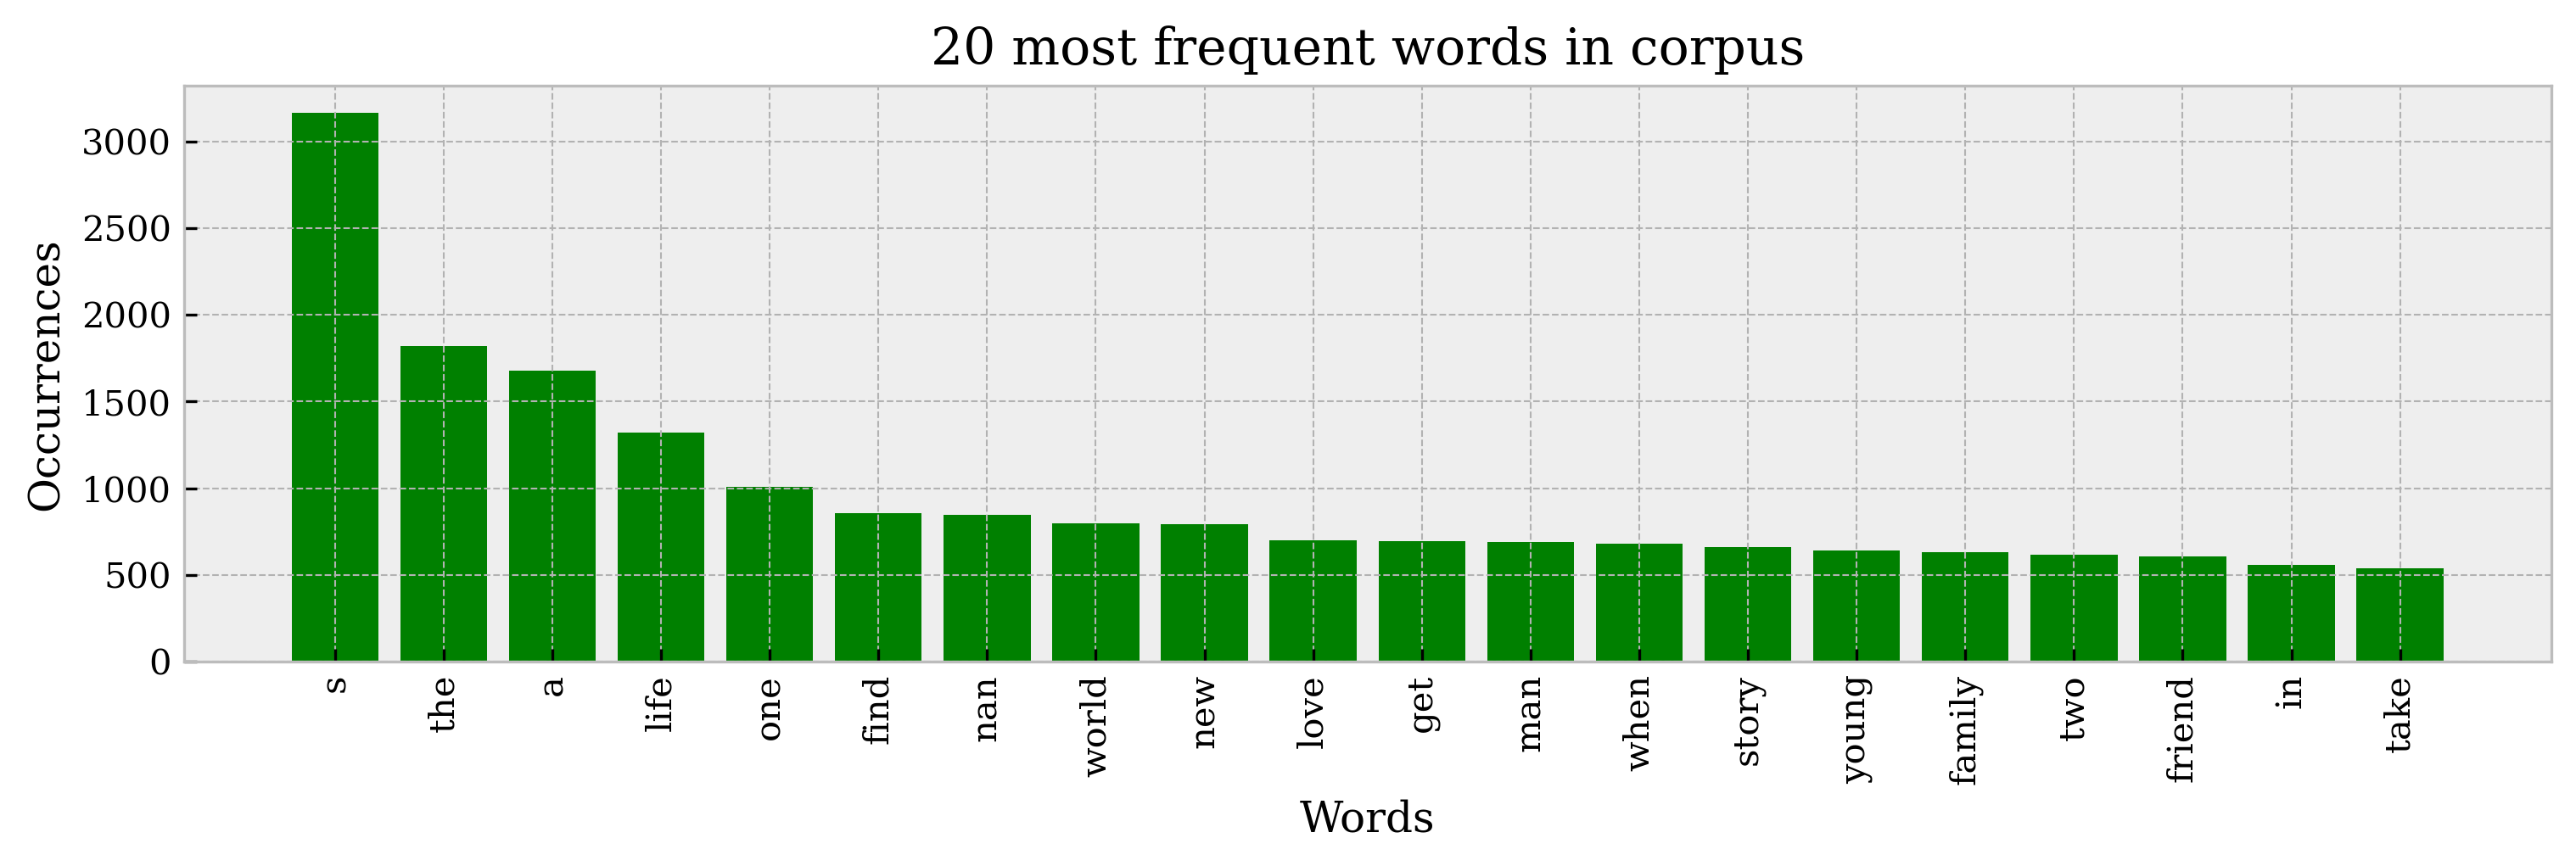

In [15]:
#barchart of the 20 most frequent words from the corpus, from above DataFrame
import matplotlib.pyplot as plt
import matplotlib.mathtext
plt.style.use('bmh')
plt.rcParams["font.family"] = "serif"

fig, most_common_words = plt.subplots(figsize=(12,3),dpi=300)

most_common_words.bar(count_all.index,count_all['count'],color='g')
most_common_words.set_xticks(count_all.index)
most_common_words.set_xticklabels(count_all.index, rotation='vertical')
most_common_words.set_ylabel('Occurrences')
most_common_words.set_xlabel('Words')
most_common_words.set_title("20 most frequent words in corpus")
plt.savefig('most_common_20.png')
plt.show()

In [16]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

# TF-IDF representation on description

TF-IDF: term frequency times inverse document frequency. 

•Term frequencies are the counts of each word in a document

•Inverse document frequency means the inverse document frequency. The number of documents that contain that word goes up, the IDF (and hence the TF-IDF) for that word will go down

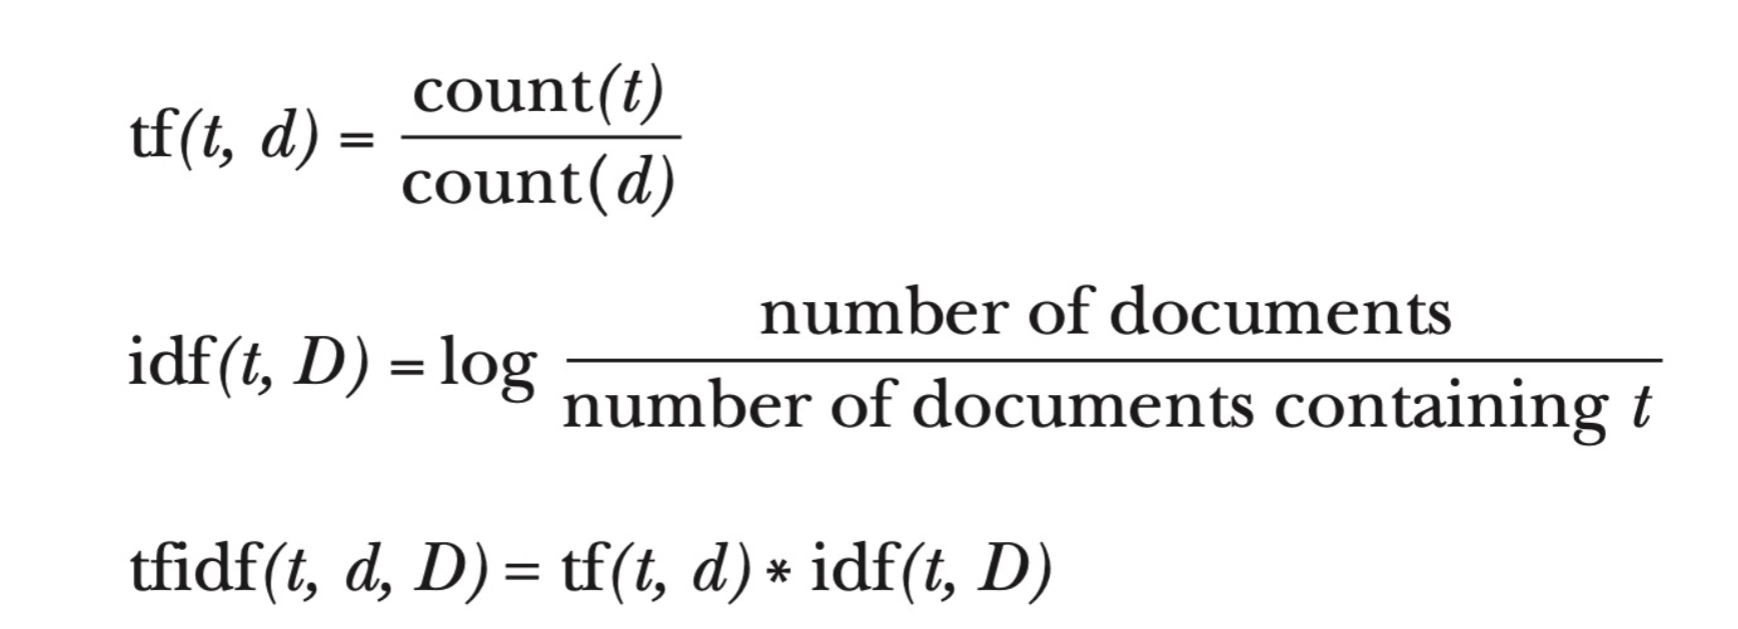

idf (t,D) represents the idf for the term/word t in document D

In [17]:
corpusRaw = df.description
corpusLabels = df.title

In [18]:
def countDoc(document):
    from collections import Counter
    counts = Counter(document)
    return counts

def createBoW_tf(document, vocabulary):
    resultVector = []
    for word in vocabulary:
        if word in document:
            resultVector.append(countDoc(document)[word] / len(document))
        else:
            resultVector.append(0)
    return resultVector

In [19]:
tfMatrix = []
for document in corpusTokens:
    tfMatrix.append(createBoW_tf(document, vocabulary))
#tfMatrix = np.array(tfMatrix)
tfMatrix = csr_matrix(tfMatrix)
print('shape',tfMatrix.shape)
from random import random
randomItem = int(random()*len(corpusRaw))
print('\nShowing vector for '+corpusLabels[randomItem]+'\n\n',np.round(tfMatrix[randomItem],3))

shape (4803, 21121)

Showing vector for The Mummy: Tomb of the Dragon Emperor

   (0, 213)	0.057
  (0, 336)	0.029
  (0, 432)	0.029
  (0, 606)	0.029
  (0, 2755)	0.029
  (0, 3009)	0.029
  (0, 4900)	0.029
  (0, 5171)	0.029
  (0, 5518)	0.029
  (0, 5536)	0.029
  (0, 5735)	0.029
  (0, 6311)	0.029
  (0, 6542)	0.029
  (0, 6789)	0.029
  (0, 7043)	0.029
  (0, 12416)	0.029
  (0, 12741)	0.029
  (0, 12966)	0.029
  (0, 13041)	0.029
  (0, 13068)	0.029
  (0, 13524)	0.029
  (0, 13801)	0.057
  (0, 14663)	0.029
  (0, 14944)	0.029
  (0, 15547)	0.029
  (0, 15657)	0.029
  (0, 16118)	0.029
  (0, 17038)	0.029
  (0, 17987)	0.029
  (0, 18157)	0.029
  (0, 18714)	0.029
  (0, 19058)	0.029
  (0, 19625)	0.029


In [20]:
#cosine similarity between these three documents, and scaling results between 0 and 1
pairwise_TF = tfMatrix*tfMatrix.T
pairwise_TF = MinMaxScaler().fit_transform(pairwise_TF.toarray().reshape(-1,1)).reshape(len(corpusRaw),len(corpusRaw))

In [21]:
pd.DataFrame(pairwise_TF,columns=corpusLabels,index=corpusLabels)

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,0.055000,0.002083,0.000000,0.000980,0.004054,0.001515,0.000000,0.001064,0.000000,0.001220,...,0.002381,0.000000,0.000676,0.001389,0.000000,0.000000,0.000000,0.001064,0.000000,0.000000
Pirates of the Caribbean: At World's End,0.002083,0.041667,0.001225,0.000817,0.003378,0.000000,0.000706,0.002660,0.003623,0.001016,...,0.001984,0.001667,0.001126,0.000000,0.000000,0.000926,0.000000,0.002660,0.000906,0.000000
Spectre,0.000000,0.001225,0.032872,0.000000,0.000000,0.001783,0.000000,0.003755,0.005115,0.000717,...,0.007003,0.000000,0.000795,0.000817,0.001279,0.000000,0.006536,0.000626,0.001279,0.000639
The Dark Knight Rises,0.000980,0.000817,0.000000,0.027297,0.003710,0.002377,0.005982,0.001669,0.005115,0.003348,...,0.000000,0.000000,0.003710,0.000000,0.001705,0.000871,0.006536,0.000834,0.002131,0.007246
John Carter,0.004054,0.003378,0.000000,0.003710,0.032871,0.000000,0.005039,0.001150,0.002350,0.001978,...,0.002574,0.001081,0.002922,0.000000,0.001567,0.000601,0.006006,0.001150,0.000000,0.004700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
El Mariachi,0.000000,0.000926,0.000000,0.000871,0.000601,0.002020,0.000753,0.001418,0.000966,0.000542,...,0.000000,0.000889,0.000901,0.001235,0.000966,0.033086,0.000000,0.000000,0.000483,0.000966
Newlyweds,0.000000,0.000000,0.006536,0.006536,0.006006,0.000000,0.009416,0.004728,0.009662,0.000000,...,0.000000,0.000000,0.007508,0.000000,0.006441,0.000000,0.111111,0.000000,0.002415,0.009662
"Signed, Sealed, Delivered",0.001064,0.002660,0.000626,0.000834,0.001150,0.001289,0.000000,0.000000,0.001850,0.001038,...,0.001013,0.000851,0.000863,0.000591,0.000308,0.000000,0.000000,0.023087,0.000463,0.000463


In [22]:
v_tr_tf = TfidfVectorizer(use_idf=True) #initializing the vectorizer
tf = v_tr_tf.fit_transform(corpusNonstop).toarray() #fit, transform corpus
vocabulary_trained = v_tr_tf.vocabulary_.keys() #get vocabulary from corpus

In [23]:
from scipy.sparse import csr_matrix
tf = csr_matrix(tf)

In [24]:
pairwise = tf*tf.T

for i in range(pairwise.shape[0]):
    pairwise[i,i] = 0

In [25]:
source = 2
numberOfMatches = 2

results = np.argsort(pairwise.toarray()[source]).tolist()[-numberOfMatches:]
results.reverse()


print('query:')
print(corpusRaw[source])
print('----------')
print()
print('results:')
print()
for result in results:
    print(corpusRaw[result])
    print('--')

query:
A Plan No One Escapes A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.
----------

results:

Sean Connery is James Bond 007 James Bond returns as the secret agent 007 one more time to battle the evil organization SPECTRE. Bond must defeat Largo, who has stolen two atomic warheads for nuclear blackmail. But Bond has an ally in Largo's girlfriend, the willowy Domino, who falls for Bond and seeks revenge. This is the last time for Sean Connery as Her Majesty's Secret Agent 007.
--
The world's masters of murder pull out all the stops to destroy Agent 007! Agent 007 is back in the second installment of the James Bond series, this time battling a secret crime organization known as SPECTRE. Russians Rosa Klebb and Kronsteen are out to snatch a decoding device known as the Lektor, using the ravishi

In [26]:
pd.DataFrame((pairwise).toarray(),columns=corpusLabels,index=corpusLabels) #output pairwise similarity matrix

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,0.000000,0.011167,0.000000,0.021704,0.029040,0.023676,0.000000,0.032400,0.000000,0.007432,...,0.010995,0.000000,0.024355,0.035116,0.000000,0.000000,0.0,0.006972,0.000000,0.000000
Pirates of the Caribbean: At World's End,0.011167,0.000000,0.014512,0.013064,0.045358,0.000000,0.013353,0.046729,0.038319,0.008137,...,0.012038,0.011826,0.016087,0.000000,0.000000,0.009352,0.0,0.030983,0.013070,0.000000
Spectre,0.000000,0.014512,0.000000,0.000000,0.000000,0.035951,0.000000,0.043664,0.038018,0.005685,...,0.068697,0.000000,0.000000,0.006183,0.017490,0.000000,0.0,0.013824,0.000000,0.005103
The Dark Knight Rises,0.021704,0.013064,0.000000,0.000000,0.010007,0.010774,0.015700,0.035559,0.044676,0.128705,...,0.000000,0.000000,0.016749,0.000000,0.000000,0.004088,0.0,0.023869,0.049330,0.024540
John Carter,0.029040,0.045358,0.000000,0.010007,0.000000,0.000000,0.009524,0.034455,0.000000,0.024461,...,0.016737,0.010508,0.000000,0.000000,0.000000,0.010607,0.0,0.010612,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
El Mariachi,0.000000,0.009352,0.000000,0.004088,0.010607,0.010150,0.022492,0.016994,0.023351,0.010154,...,0.000000,0.005670,0.021918,0.017703,0.011183,0.000000,0.0,0.000000,0.003340,0.009615
Newlyweds,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020215,0.000000,0.0,0.000000,0.000000,0.000000
"Signed, Sealed, Delivered",0.006972,0.030983,0.013824,0.023869,0.010612,0.023914,0.000000,0.000000,0.030090,0.011221,...,0.007515,0.005238,0.011993,0.018316,0.002840,0.000000,0.0,0.000000,0.007590,0.003886


In [27]:
corpusLabels

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [28]:
v_tr_tfidf = TfidfVectorizer(min_df=1, use_idf=True, vocabulary=vocabulary_trained) #using IDF also with Scikit-learn
tfidf = v_tr_tfidf.fit_transform(corpusNonstop) 
pd.DataFrame((tfidf*tfidf.T).toarray(),columns=corpusLabels, index=corpusLabels)

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.011167,0.000000,0.021704,0.029040,0.023676,0.000000,0.032400,0.000000,0.007432,...,0.010995,0.000000,0.024355,0.035116,0.000000,0.000000,0.0,0.006972,0.000000,0.000000
Pirates of the Caribbean: At World's End,0.011167,1.000000,0.014512,0.013064,0.045358,0.000000,0.013353,0.046729,0.038319,0.008137,...,0.012038,0.011826,0.016087,0.000000,0.000000,0.009352,0.0,0.030983,0.013070,0.000000
Spectre,0.000000,0.014512,1.000000,0.000000,0.000000,0.035951,0.000000,0.043664,0.038018,0.005685,...,0.068697,0.000000,0.000000,0.006183,0.017490,0.000000,0.0,0.013824,0.000000,0.005103
The Dark Knight Rises,0.021704,0.013064,0.000000,1.000000,0.010007,0.010774,0.015700,0.035559,0.044676,0.128705,...,0.000000,0.000000,0.016749,0.000000,0.000000,0.004088,0.0,0.023869,0.049330,0.024540
John Carter,0.029040,0.045358,0.000000,0.010007,1.000000,0.000000,0.009524,0.034455,0.000000,0.024461,...,0.016737,0.010508,0.000000,0.000000,0.000000,0.010607,0.0,0.010612,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
El Mariachi,0.000000,0.009352,0.000000,0.004088,0.010607,0.010150,0.022492,0.016994,0.023351,0.010154,...,0.000000,0.005670,0.021918,0.017703,0.011183,1.000000,0.0,0.000000,0.003340,0.009615
Newlyweds,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020215,0.000000,1.0,0.000000,0.000000,0.000000
"Signed, Sealed, Delivered",0.006972,0.030983,0.013824,0.023869,0.010612,0.023914,0.000000,0.000000,0.030090,0.011221,...,0.007515,0.005238,0.011993,0.018316,0.002840,0.000000,0.0,1.000000,0.007590,0.003886


In [29]:
df[df.title=="Spider-Man"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description,corpusNonstop
159,139000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://www.sonypictures.com/movies/spider-man/,557,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"": 3986, ""name"": ""spider""}, {""id"": 4543, ""name"": ""thanksgiving""}, {""id"": 5812, ""name"": ""bad boss""}, {""id"": 6062, ""name"": ""hostility""}, {""id"": 8828, ""name"": ""marvel comic""}, {""id"": 9715, ""name"": ""superhero""}, {""id"": 11794, ""name"": ""pokies""}, {""id"": 156075, ""name"": ""evil""}, {""id"": 169887, ""name"": ""reference to superman""}, {""id"": 189094, ""name"": ""goblin""}]",en,Spider-Man,"After being bitten by a genetically altered spider, nerdy high school student Peter Parker is endowed with amazing powers.",82.502566,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Marvel Enterprises"", ""id"": 19551}]",...,821708551,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,With great power comes great responsibility.,Spider-Man,6.8,5265,"With great power comes great responsibility. After being bitten by a genetically altered spider, nerdy high school student Peter Parker is endowed with amazing powers.",with great power come great responsibility after bitten genetically altered spider nerdy high school student peter parker endowed amazing power


In [30]:
queriesRaw = [ """ 'With great power comes great responsibility. """
               """After being bitten by a genetically altered spider, """
               """nerdy high school student Peter Parker is endowed with amazing powers' """  
             ]

queryLabels = ['Spider-Man']

In [31]:
queriesNonstop = preprocessing(queriesRaw)[1] #preprocessing the queries

In [32]:
queriesNonstop

['with great power come great responsibility after bitten genetically altered spider nerdy high school student peter parker endowed amazing power']

In [33]:
queriesNonstop = preprocessing(queriesRaw)[1] #preprocessing the queries

tfidfWithQueries = v_tr_tfidf.fit_transform(corpusNonstop)

Spider_Man_Similary_Df = pd.DataFrame((tfidfWithQueries*tfidfWithQueries.T).toarray(), 
             columns=corpusLabels, 
             index=corpusLabels)[queryLabels].drop(queryLabels)

In [34]:
Spider_Man_Similary_Df.sort_values("Spider-Man", ascending = False).head(10)

title,Spider-Man
title,
The Amazing Spider-Man 2,0.175705
The Amazing Spider-Man,0.159476
21 Jump Street,0.156537
The Covenant,0.152344
Arachnophobia,0.151468
Eight Legged Freaks,0.136851
Spider-Man 3,0.136843
Clerks II,0.133804
The Reef,0.131357


# LDiA

•Compute the average position (centroid) of all the TF-IDF vectors 
within the class (such as spam SMS messages).

•Compute the average position (centroid) of all the TF-IDF vectors 
not in the class (such as nonspam SMS messages).

•Compute the vector difference between the centroids (the line 
that connects them).

In [35]:
# import sms-spam.csv
import numpy as np
import pandas as pd

from sklearn.decomposition import TruncatedSVD

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=corpusNonstop).toarray()
print(tfidf_docs.shape)
print(type(tfidf_model.fit_transform(raw_documents=corpusNonstop)))

(4803, 21114)
<class 'scipy.sparse.csr.csr_matrix'>


In [37]:
print(tfidf_model.get_feature_names()[:20])

['0', '00', '000', '0000', '007', '050506', '1', '10', '100', '1000', '10000', '100000', '1000000', '1000foot', '1001', '10191', '101yearold', '108yearold', '10round', '10th']


In [38]:
print(tfidf_docs[:2])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

n_samples = 4837
n_features = 1000
n_components = 10
n_top_words = 5
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(df["corpusNonstop"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [40]:
import pandas as pd
import numpy as np

from sklearn.decomposition import LatentDirichletAllocation

In [41]:
# another implementation with more visualization

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [42]:
import matplotlib.pyplot as plt
# plot_top_words, see sklearn documentation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    # plt.show()
    plt.savefig('topics.png')



[[ 0.10150494  0.10130079  0.10261684 ...  0.10207426  0.10113466
   0.10150937]
 [ 0.10121947  0.10137263  0.10140345 ...  0.10220408  0.10143817
   0.101188  ]
 [ 0.10408466  0.10099983  0.10593491 ...  0.10660131  0.10132449
   0.10102663]
 ...
 [ 0.14356201  0.1021688   0.66162742 ...  0.2590959   0.14810394
   0.10115534]
 [ 2.04652698  0.67545715  2.65437373 ...  1.32129344  2.72289813
  12.1541255 ]
 [ 0.10149067  0.10131004  0.10138882 ...  0.10128895  0.10351503
   0.101927  ]]


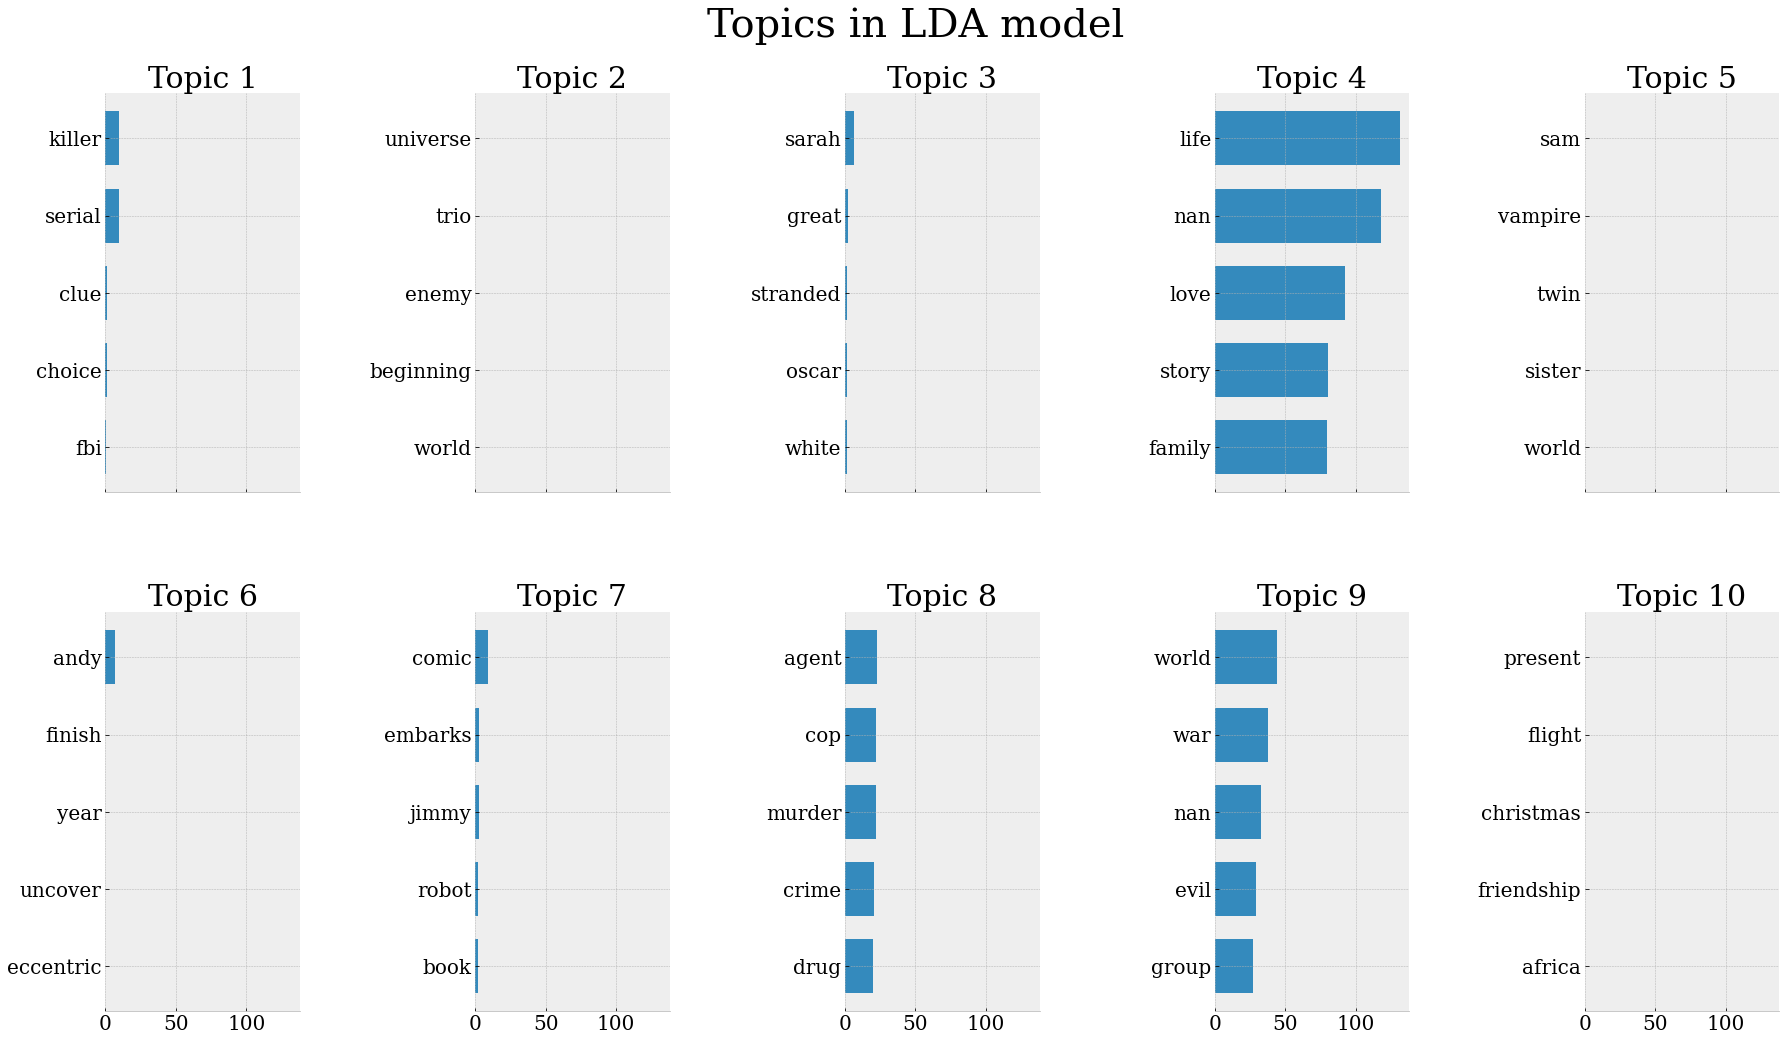

In [43]:
print(lda.components_)
%matplotlib inline
plot_top_words(lda, tfidf_feature_names, n_top_words, "Topics in LDA model")

# Word2vec

The parameters:

min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)

window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)

size = int - Dimensionality of the feature vectors. - (50, 300)

sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)

alpha = float - The initial learning rate - (0.01, 0.05)

min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00

negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)

workers = int - Use these many worker threads to train the model (=faster training with multicore machines)

Problem with this approach is that it assigned exactly one vector for each word, which is why it is considered as static word embeddings. This is particularly problematic when embedding words with multiple meaning (i.e. polysemous words), such as the word open; it can mean uncovered, honest, or available, depending on the context.

In [44]:
from gensim.models import Word2Vec

In [100]:
# Select features from original dataset to form a new dataframe 
df1 = df[['original_title','overview','tagline','title']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]


[['Avatar',
  'In the 22nd century',
  ' a paraplegic Marine is dispatched to the moon Pandora on a unique mission',
  ' but becomes torn between following orders and protecting an alien civilization.',
  'Enter the World of Pandora.',
  'Avatar'],
 ["Pirates of the Caribbean: At World's End",
  'Captain Barbossa',
  ' long believed to be dead',
  ' has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.',
  'At the end of the world',
  ' the adventure begins.',
  "Pirates of the Caribbean: At World's End"]]

In [101]:
model = Word2Vec(sent, min_count=1,workers=3, window =3, sg = 1)
model.wv.most_similar('Avatar')
model.wv.similarity('Avatar','Spider-Man 3')
vocab = model.wv.key_to_index
print(f'words in vocab: {len(vocab)}')
sim_words = model.wv.most_similar('Spider-Man', topn=7)
sim_words

words in vocab: 27699


[(' believing it to be an undisturbed eco-system that has produced a new species',
  0.4007412791252136),
 (" the establishment's proprietors are hardly ready to oblige him.",
  0.3828011751174927),
 (' now a music record executive', 0.36111605167388916),
 ('A Walk to Remember', 0.3607145845890045),
 (' none of the education.', 0.3599890172481537),
 (' Alec Baldwin… or does it?', 0.35226109623908997),
 ('Jupiter Ascending', 0.34598177671432495)]

In [72]:
import numpy as np
#from scipy.stats import norm

def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word]
    for item in target_list :
        try:
            if item != word :
                b = model.wv[item]
                cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
                cosine_dict[item] = cos_sim
        except:
            continue
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [76]:
# only get the unique tittle
title = list(df.title.unique()) 
#print(title)
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance(model,'Spider-Man 3',title,5)
 

[('Austin Powers: The Spy Who Shagged Me', 0.35628283),
 ('Superbabies: Baby Geniuses 2', 0.3194829),
 ('The Girl with the Dragon Tattoo', 0.31674314),
 ('Wolf', 0.31167474),
 ('Winnie Mandela', 0.30644676)]

C:\Users\lngng\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lngng\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lngng\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lngng\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lngng\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\lngng\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23487 missing from cur

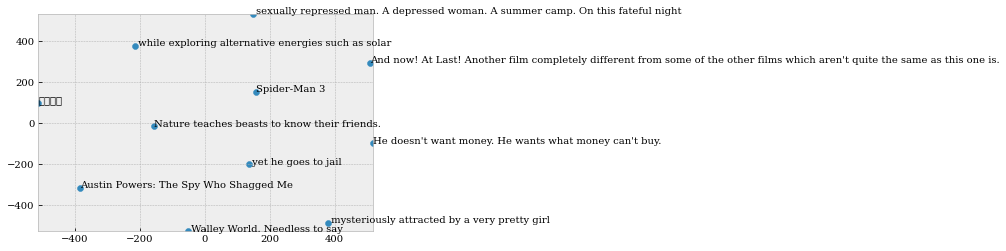

In [98]:
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
display_closestwords_tsnescatterplot(model, 'Spider-Man 3') 

This T-SNE plot shows the top 10 similar movies to Spider-Man 3 in two-dimensional space.
